# Compare kinematic coverage with existing data
last edit Jan-17, 2023

## Imports and definitions

In [1]:
import sys; 
software_path = '/Users/erezcohen/Desktop/Software/'
sys.path.insert(0, software_path + '/mySoftware/Python/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/AcceptanceCorrections/');
sys.path.insert(0, software_path + '/CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/');
from my_tools                     import *; 
from plot_tools                   import *;
from my_data_analysis_tools       import *;
from acceptance_correction_tools  import *;
from sidis_analysis_tools         import *;
# from event_selection_tools        import *;

In [2]:
%config InlineBackend.figure_format = 'retina'
plt.rcParams['mathtext.fontset']    = 'stix'
plt.rcParams['font.family']         = 'STIXGeneral'

In [3]:
figures_path = '/Users/erezcohen/Desktop/Projects/BAND/AnalysisNote/Figures/KinematicalDistributions/'

# (1) Load data and apply selection cuts not previously imposed
All runs of $(e,e'\pi)$ data and all runs of $(e,e'\pi n)$ - as with a small number of runs normalization is off

In [4]:
[e_e_pi, e_e_pi_n, e_e_pi_FreeP] = load_SIDIS_data( Nruns = 1,
                                        subdirname      = "sidisdvcs_27Oct2022_commit_2fe215f",
                                        FreePsubdirname = "nSidis_12Jan2023_commit_ad849e5",
                                        do_e_e_pi=True, 
                                        do_e_e_pi_n=False, 
                                        do_e_e_pi_FreeP=True,
                                        do_all_vars=True, 
                                       fdebug=2)
e_e_pi_pass_cuts,e_e_pi_n_pass_cuts,e_e_pi_FreeP_pass_cuts,_ = apply_further_selection_cuts_to_data(doApply_Mx_cut=False,
                                                                                                    fdebug=0);

Run number  6421 (1/1 runs)
Loaded 385297  d(e,e'π+) events
Loaded 162638  d(e,e'π-) events
Free-P RGA Run number  6616 (1/1 runs)
Loaded 22981  p(e,e'π+) events
Loaded 7166  p(e,e'π-) events
Done loading files.

Total statistics:
385297  d(e,e'π+)  events
22981  p(e,e'π+)  events
162638  d(e,e'π-)  events
7166  p(e,e'π-)  events
Applying selection cuts not previously imposed
Apply a π+/π- acceptance matching cut on the in p-theta plane


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS

(e,e π+ )
385297 events after original cut (100.0 %)
261536 events after p-theta cut (67.9 %)
261536 events after Mx cut (67.9 %)
261536 events after Kinematical cut (67.9 %)
(e,e π- )
162638 events after original cut (100.0 %)
157543 events after p-theta cut (96.9 %)
157543 events after Mx cut (96.9 %)
157543 events after Kinematical cut (96.9 %)
 
Apply a π+/π- acceptance matching cut on the in p-theta plane
p(e,e π+ )
22981 events after original cut (100.0 %)
16560 events after p-theta cut (72.1 %)
16560 events after Mx cut (72.1 %)
16560 events after Kinematical cut (72.1 %)
p(e,e π- )
7166 events after original cut (100.0 %)
6966 events after p-theta cut (97.2 %)
6966 events after Mx cut (97.2 %)
6966 events after Kinematical cut (97.2 %)
 
Done applying event-selection cuts


/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS_at_BAND/PythonAnalysis/python_auxiliary/sidis_analysis_tools.py:574: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_after_cut = df_after_cut.append(df_in_sector_pass_cut);
/Users/erezcohen/Desktop/Software//CLAS12/BAND/SIDIS

# (2) Count event statistics

In [5]:
Stats = dict()
for pi_ch,pi_print,pi_label,pi_color,pi_idx in zip(pi_charge_names,pi_prints,pi_labels,pi_colors,[1,2]):
    Stats["$d(e,e'"+pi_label+")$"]  = float(len(e_e_pi_pass_cuts[pi_ch]))
Stats["$d(e,e'\\pi^{+})/d(e,e'\\pi^{-})$"] = Stats["$d(e,e'\\pi^{+})$"]/Stats["$d(e,e'\\pi^{-})$"]
display(Stats)

{"$d(e,e'\\pi^{+})$": 261536.0,
 "$d(e,e'\\pi^{-})$": 157543.0,
 "$d(e,e'\\pi^{+})/d(e,e'\\pi^{-})$": 1.6600928000609358}

# (3) Plot kinematic coverage
of our data and existing data

## $Q^2$ vs. $W$

<ErrorbarContainer object of 3 artists>

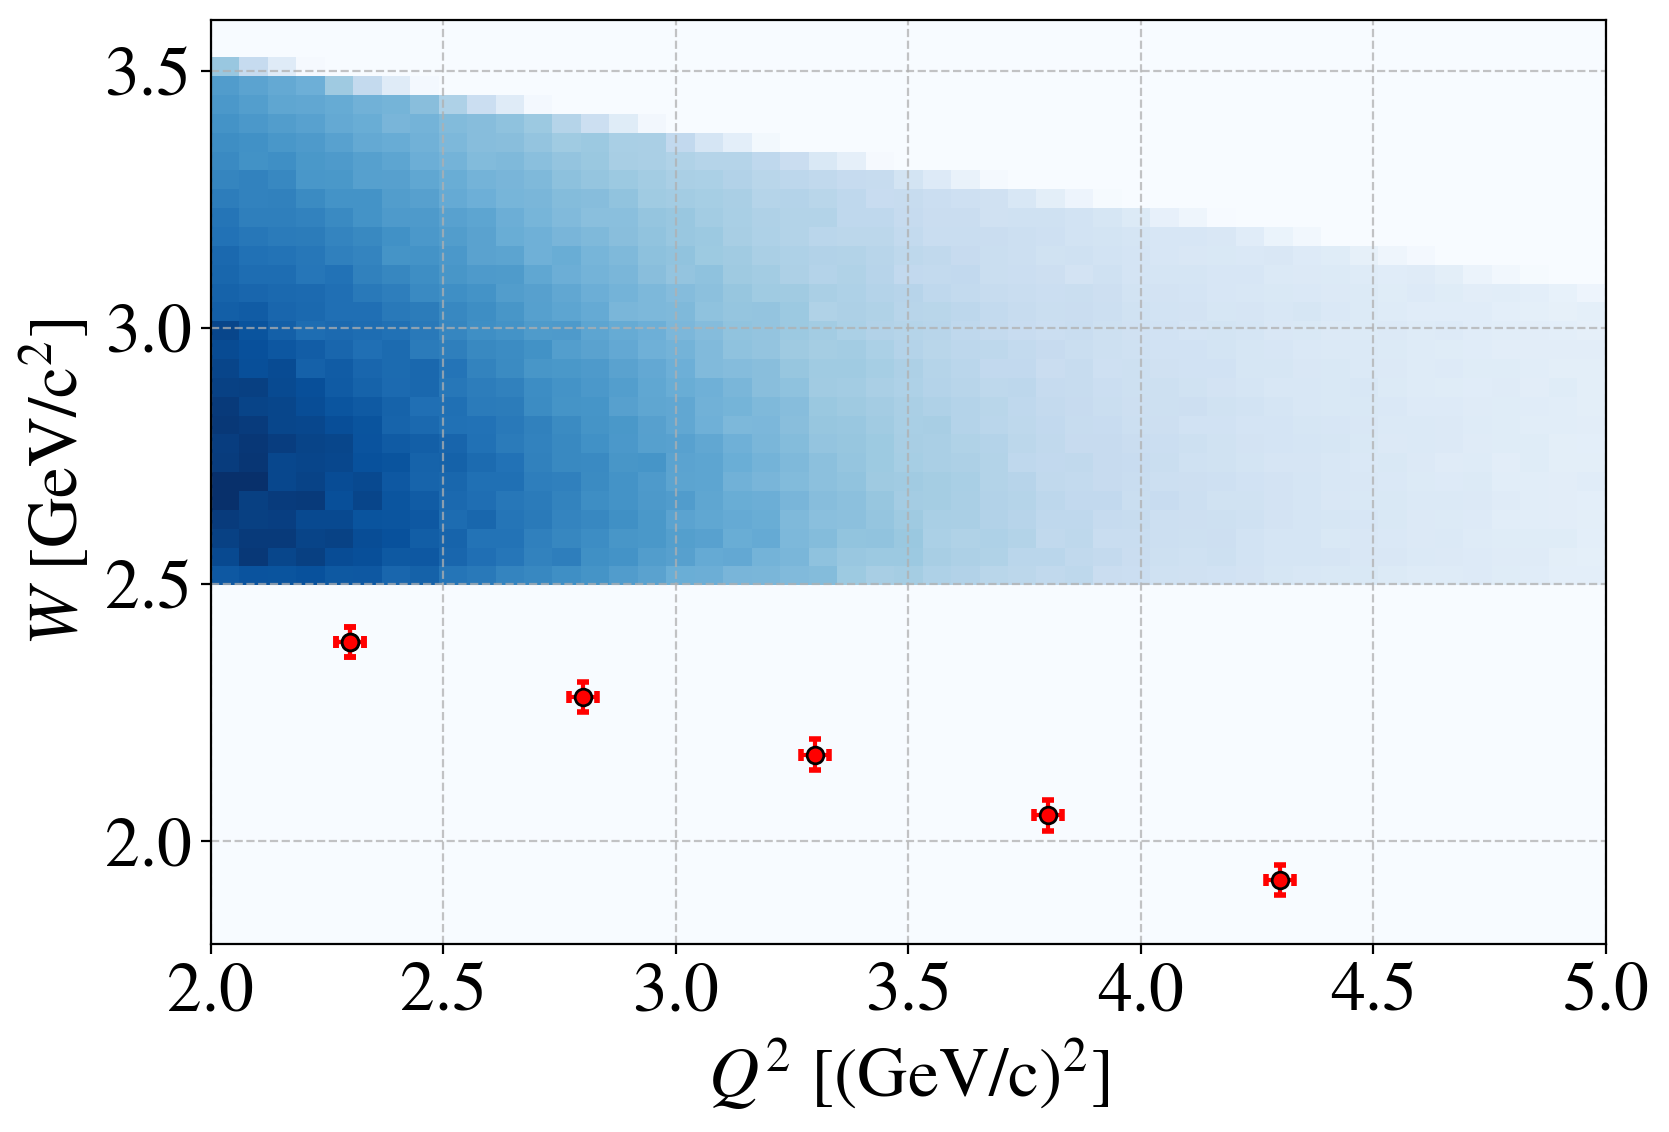

In [6]:
Q2min, Q2max = 2,5
Wmin,  Wmax  = 1.8,3.6
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_pass_cuts[pi_ch]
plt.hist2d( df.Q2 , df.W, 
           bins=(np.linspace(Q2min,Q2max,50),np.linspace(Wmin,Wmax,50)), 
           cmap = 'Blues' );

set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$W$ [GeV/c$^2$]',          
         do_add_grid=True, do_add_legend=False,
         yticks=(2,2.5,3,3.5));


## JLAB2012 data
JLAB2012_Q2 = [2.3, 1.85, 2.3, 2.8, 3.3, 3.8, 4.3]
JLAB2012_W  = np.sqrt(np.array([5.7, 6.16, 5.7, 5.2, 4.7, 4.2, 3.7]))
plt.errorbar( x=JLAB2012_Q2, xerr=0.03, y=JLAB2012_W, yerr=0.03, 
             marker='o', 
             markerfacecolor='r', 
             color='r', 
             markeredgecolor='k', 
             linestyle='None', capthick=2, capsize=2)

## $Q^2$ vs. $z$

<ErrorbarContainer object of 3 artists>

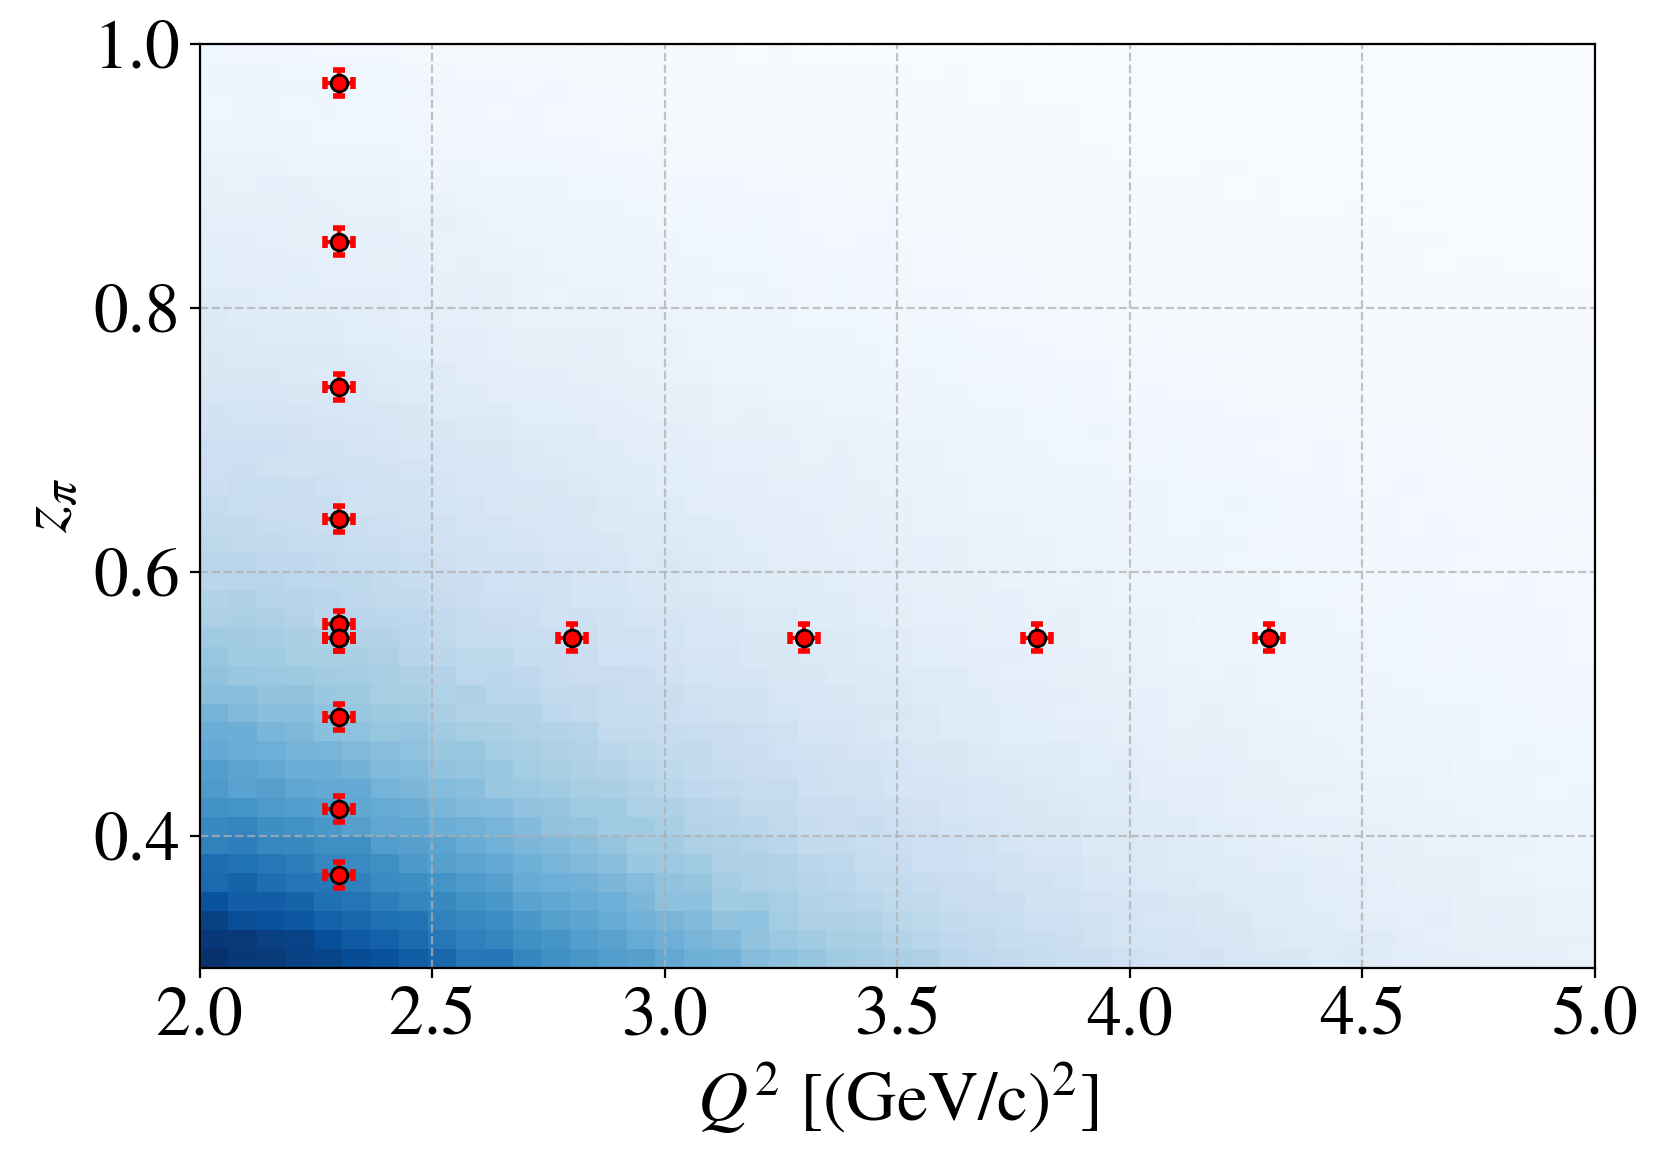

In [7]:
Q2min, Q2max = 2,5
zmin,  zmax  = 0.3,1
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_pass_cuts[pi_ch]
plt.hist2d( df.Q2 , df.Zpi, 
           bins=(np.linspace(Q2min,Q2max,50),np.linspace(zmin,zmax,50)), 
           cmap = 'Blues' );

set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$z_\pi$',          
         do_add_grid=True, do_add_legend=False,
         yticks=(0.4, 0.6, 0.8, 1.)
        );


## JLAB2012 data
JLAB2012_Q2 = [2.3,  2.3,  2.3,   2.3,  2.3,  2.3, 2.3,  2.3 ]
JLAB2012_z  = [0.37, 0.42, 0.49, 0.56, 0.64, 0.74, 0.85, 0.97]
plt.errorbar( x=JLAB2012_Q2, xerr=0.03, y=JLAB2012_z, yerr=0.01, 
             marker='o', 
             markerfacecolor='r', 
             color='r', 
             markeredgecolor='k', 
             linestyle='None', capthick=2, capsize=2)


JLAB2012_Q2 = [1.85, 2.3,   2.8,  3.3,  3.8,  4.3, 2.3 ]
JLAB2012_z  = [0.55, 0.55, 0.55, 0.55, 0.55, 0.55, 0.55]
plt.errorbar( x=JLAB2012_Q2, xerr=0.03, y=JLAB2012_z, yerr=0.01, 
             marker='o', 
             markerfacecolor='r', 
             color='r', 
             markeredgecolor='k', 
             linestyle='None', capthick=2, capsize=2)

## $Q^2$ in 1D

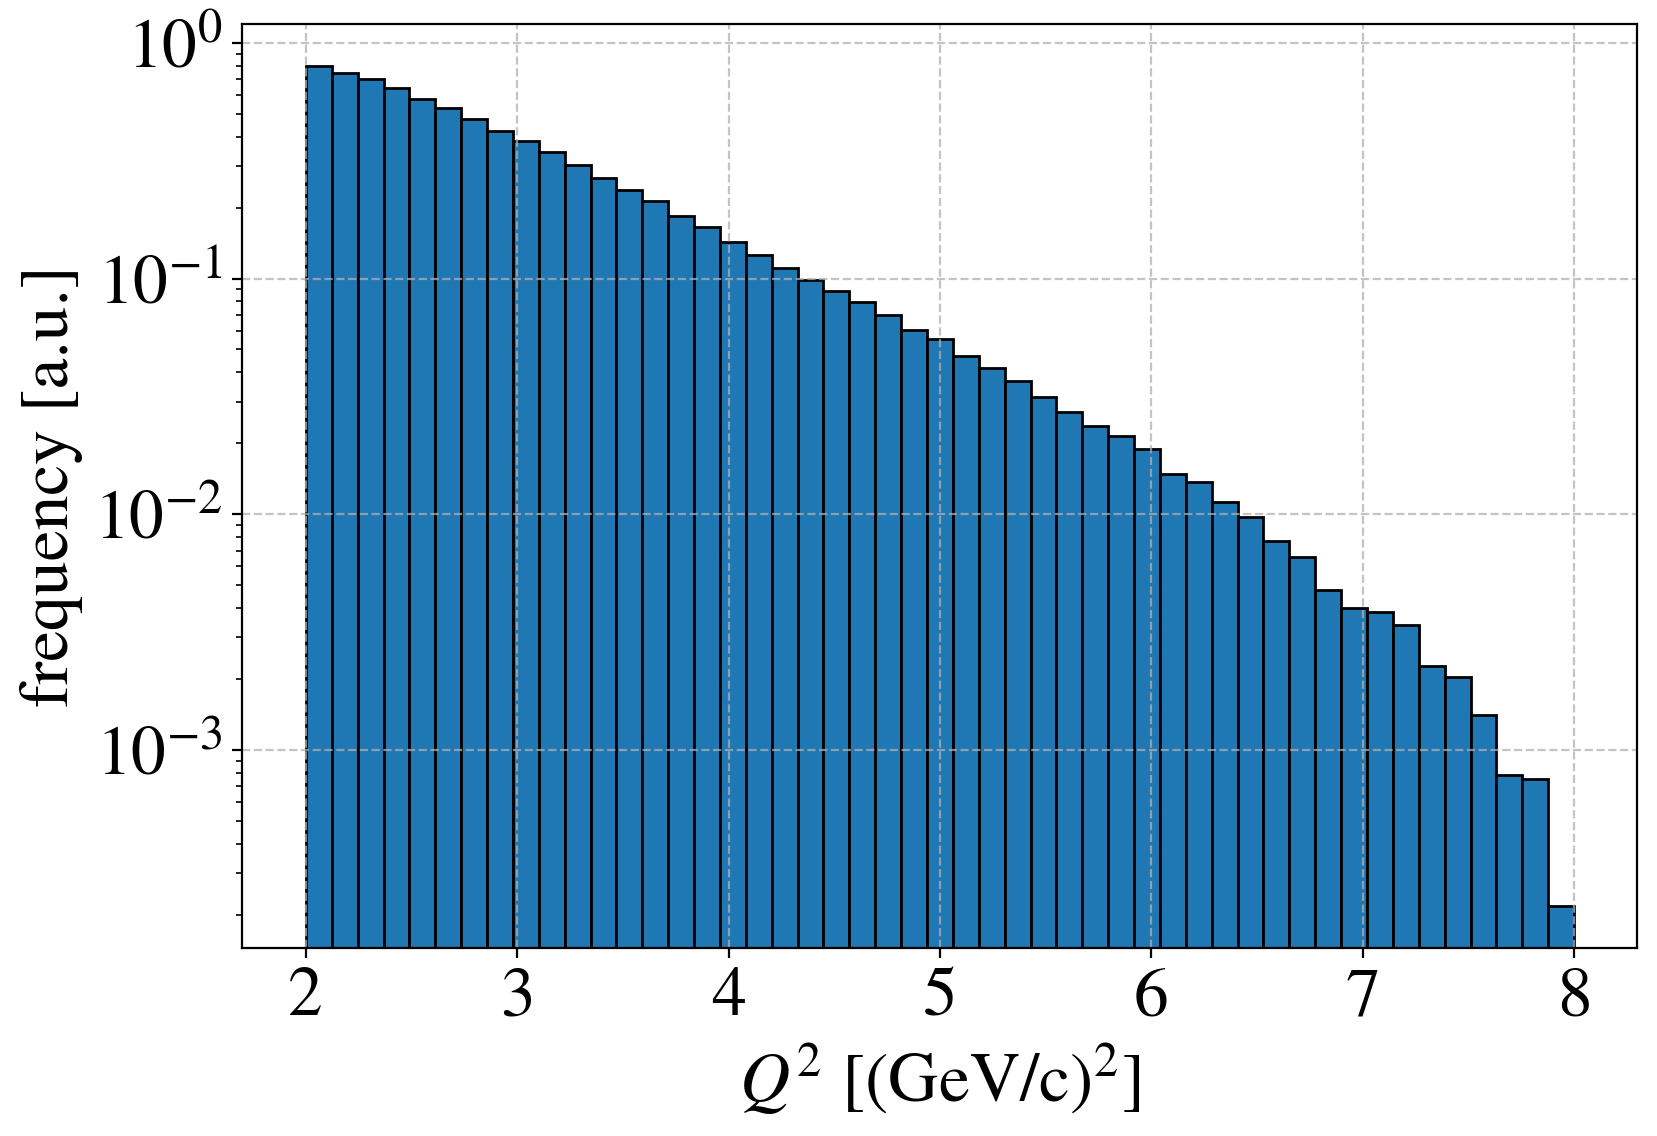

In [6]:
Q2min, Q2max = 2,8
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_pass_cuts[pi_ch]
plt.hist ( df.Q2 , bins=(np.linspace(Q2min,Q2max,50)), edgecolor='k', density=True);
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','frequency [a.u.]',          
         do_add_grid=True, do_add_legend=False,
         # yticks=(0.4, 0.6, 0.8, 1.)
        );
ax.set_yscale('log')

## What is the mean $Q^2$ for a subdivision of $Q^2$ to bins of 0.5 (GeV/c)$^2$ ?

In [12]:
Q2_min_arr  = np.arange(2.0,6.5,0.5)
Q2_max_arr  = Q2_min_arr+0.5
Q2 = e_e_pi_pass_cuts[pi_ch].Q2
mean_Q2_in_bin,mid_Q2_in_bin = [],[]
for Q2_min,Q2_max in zip(Q2_min_arr,Q2_max_arr):
    Q2_in_bin = Q2[(Q2_min < Q2) & (Q2 < Q2_max)]
    mean_Q2_in_bin.append(np.mean(Q2_in_bin))
    mid_Q2_in_bin.append(np.mean([Q2_min,Q2_max]))
    print(Q2_min,'<Q2<',Q2_max, '<Q2> = ',np.mean(Q2_in_bin))

print(mean_Q2_in_bin)
print( np.array(mean_Q2_in_bin) - np.array(mid_Q2_in_bin) )


2.0 <Q2< 2.5 <Q2> =  2.2379447278880575
2.5 <Q2< 3.0 <Q2> =  2.7327237911819697
3.0 <Q2< 3.5 <Q2> =  3.229247347882758
3.5 <Q2< 4.0 <Q2> =  3.7285861975155217
4.0 <Q2< 4.5 <Q2> =  4.2295569549061796
4.5 <Q2< 5.0 <Q2> =  4.728526705486743
5.0 <Q2< 5.5 <Q2> =  5.225651753362419
5.5 <Q2< 6.0 <Q2> =  5.728560428923444
6.0 <Q2< 6.5 <Q2> =  6.222655737404182
[2.2379447278880575, 2.7327237911819697, 3.229247347882758, 3.7285861975155217, 4.2295569549061796, 4.728526705486743, 5.225651753362419, 5.728560428923444, 6.222655737404182]
[-0.01205527 -0.01727621 -0.02075265 -0.0214138  -0.02044305 -0.02147329
 -0.02434825 -0.02143957 -0.02734426]


## $W$ in 1D

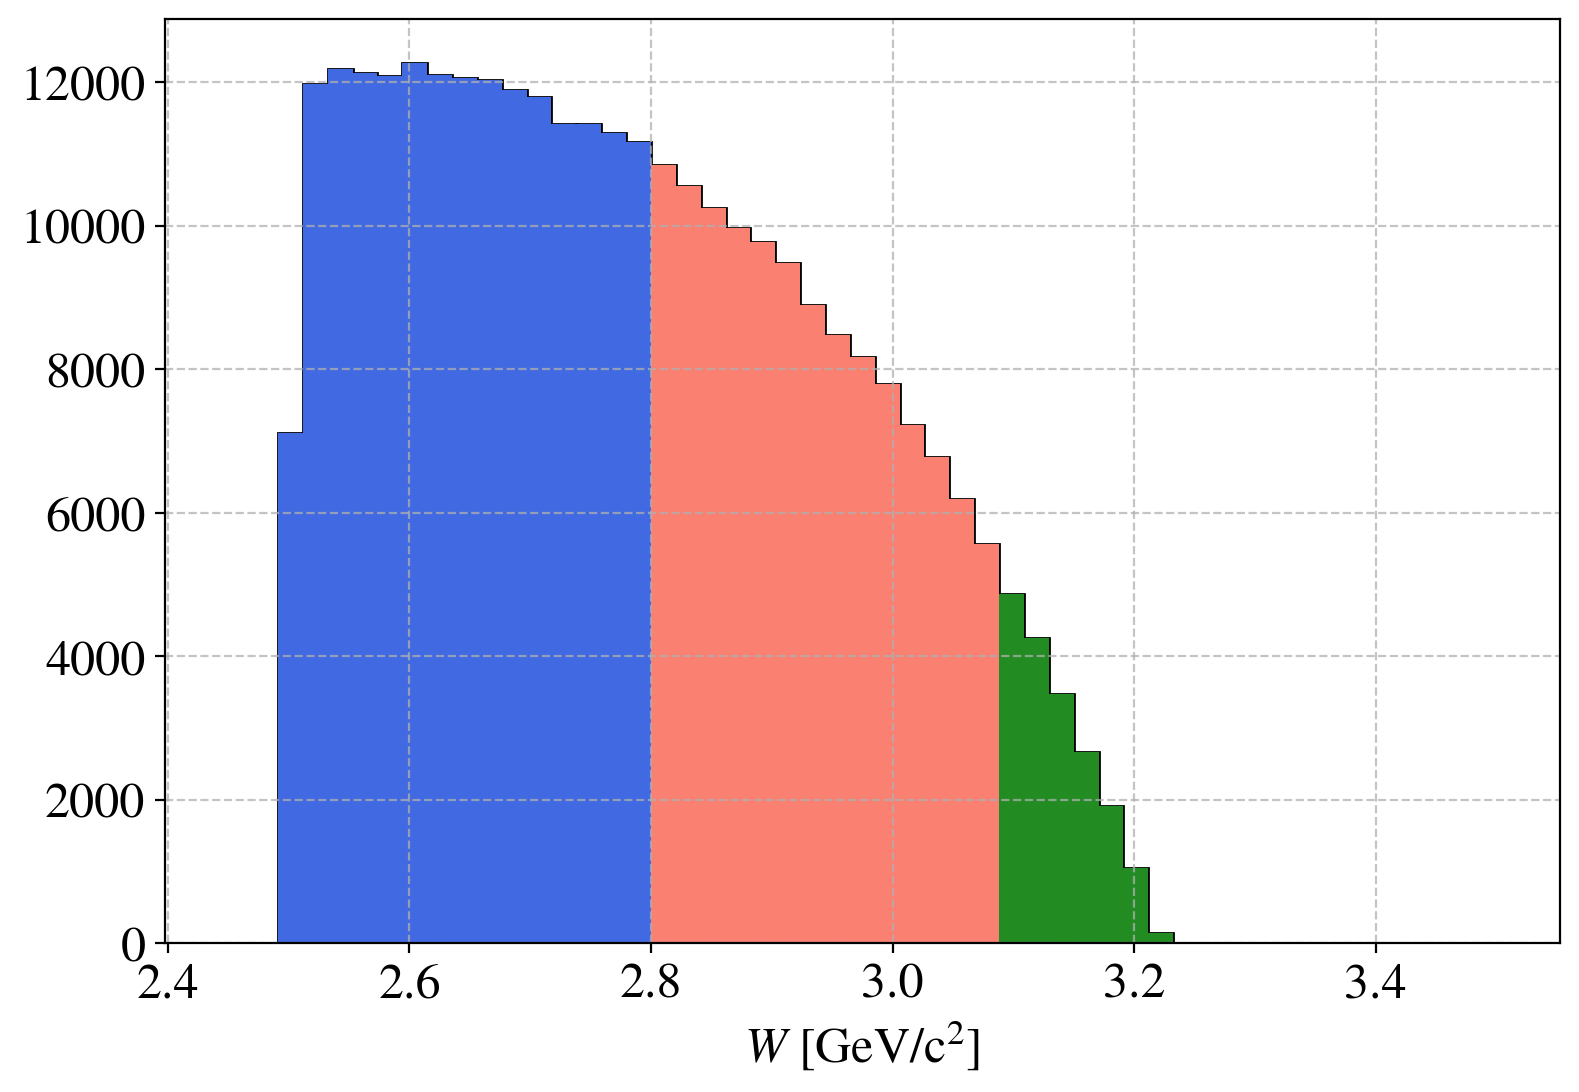

In [9]:
Wmin, Wmax = 2.45,3.5
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_pass_cuts[pi_ch]
df = df[df.Q2>4]
h,edges,_ = plt.hist ( df.W , bins=(np.linspace(Wmin, Wmax,52)), edgecolor='k', density=False);
W = (edges[1:]+edges[:-1])/2
dW = (edges[1:]-edges[:-1])

N1 = 17
N2 = 31
plt.bar ( W[:N1] , h[:N1], dW[0:N1],color='royalblue' );
plt.bar ( W[N1:N2] , h[N1:N2], dW[N1:N2],color='salmon' );
plt.bar ( W[N2:] , h[N2:], dW[N2:],color='forestgreen' );

set_axes(ax,'$W$ [GeV/c$^2$]','',
         do_add_grid=True, do_add_legend=False, fontsize=18,
         # yticks=(0.001,0.10,1),ylim=(0.01,1.2)
        );
# ax.set_yscale( 'log')

### What happens for free-proton data?

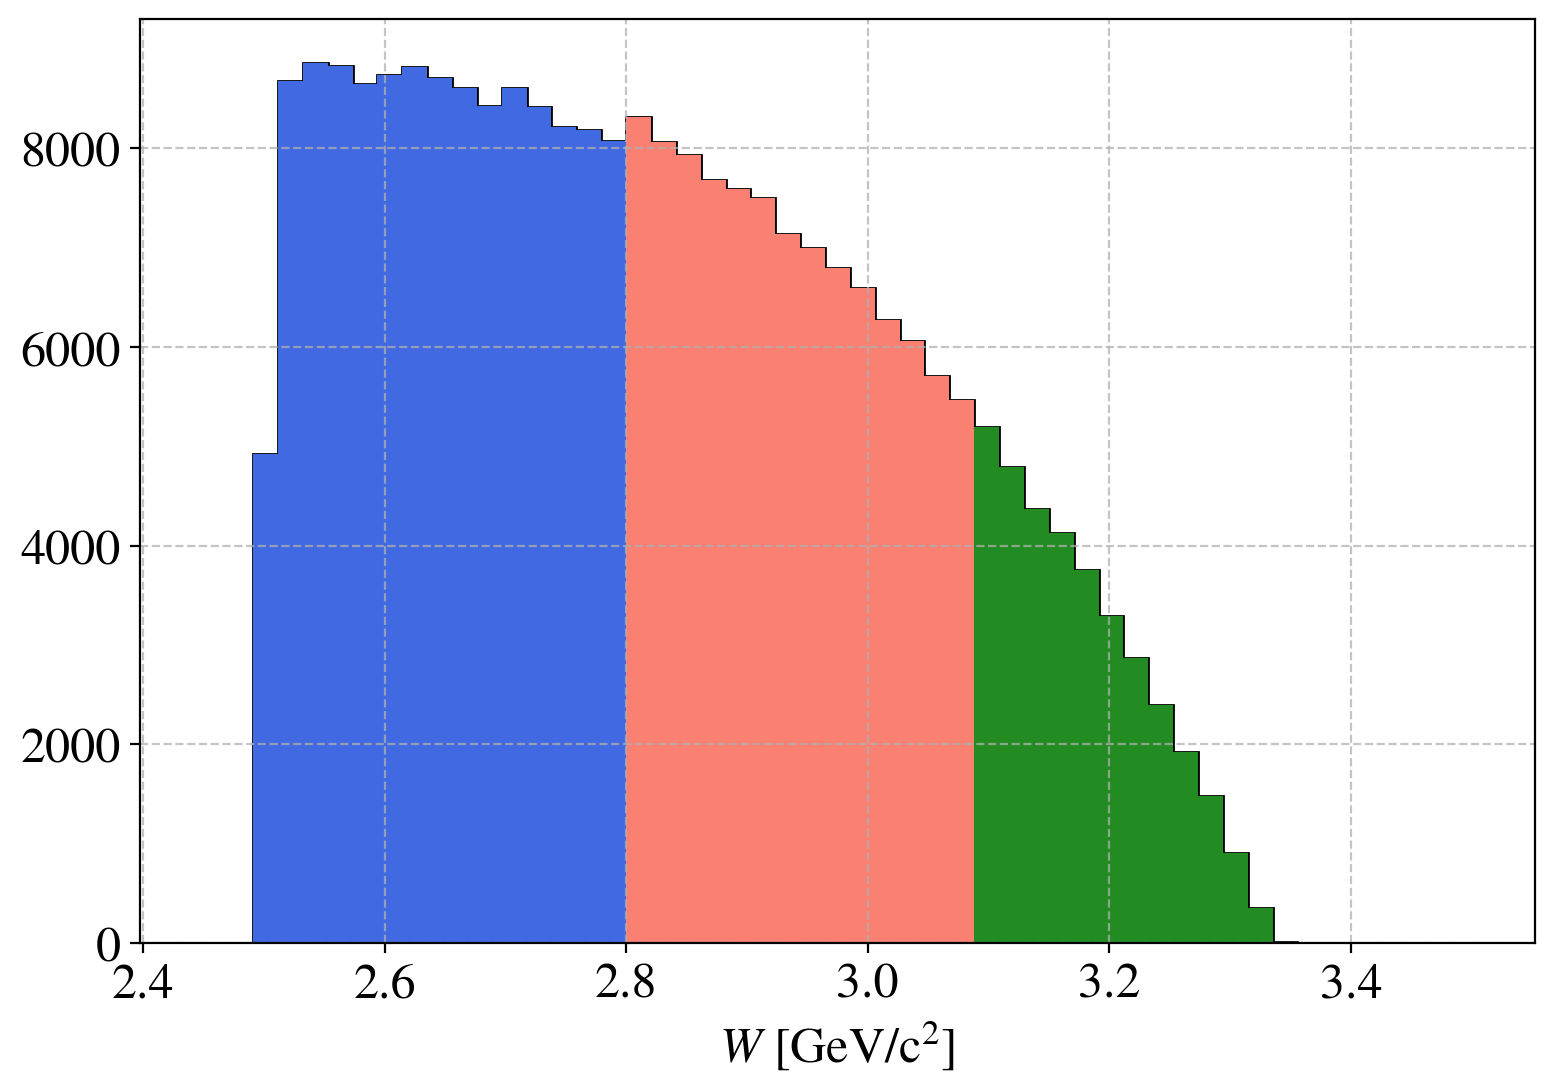

In [10]:
Wmin, Wmax = 2.45,3.5
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_FreeP_pass_cuts[pi_ch]
df = df[df.Q2>4]
h,edges,_ = plt.hist ( df.W , bins=(np.linspace(Wmin, Wmax,52)), edgecolor='k', density=False);
W = (edges[1:]+edges[:-1])/2
dW = (edges[1:]-edges[:-1])

N1 = 17
N2 = 31
plt.bar ( W[:N1] , h[:N1], dW[0:N1],color='royalblue' );
plt.bar ( W[N1:N2] , h[N1:N2], dW[N1:N2],color='salmon' );
plt.bar ( W[N2:] , h[N2:], dW[N2:],color='forestgreen' );

set_axes(ax,'$W$ [GeV/c$^2$]','',
         do_add_grid=True, do_add_legend=False, fontsize=18,
         # yticks=(0.001,0.10,1),ylim=(0.01,1.2)
        );
# ax.set_yscale( 'log')

## $Q^2$ vs. $x_B$

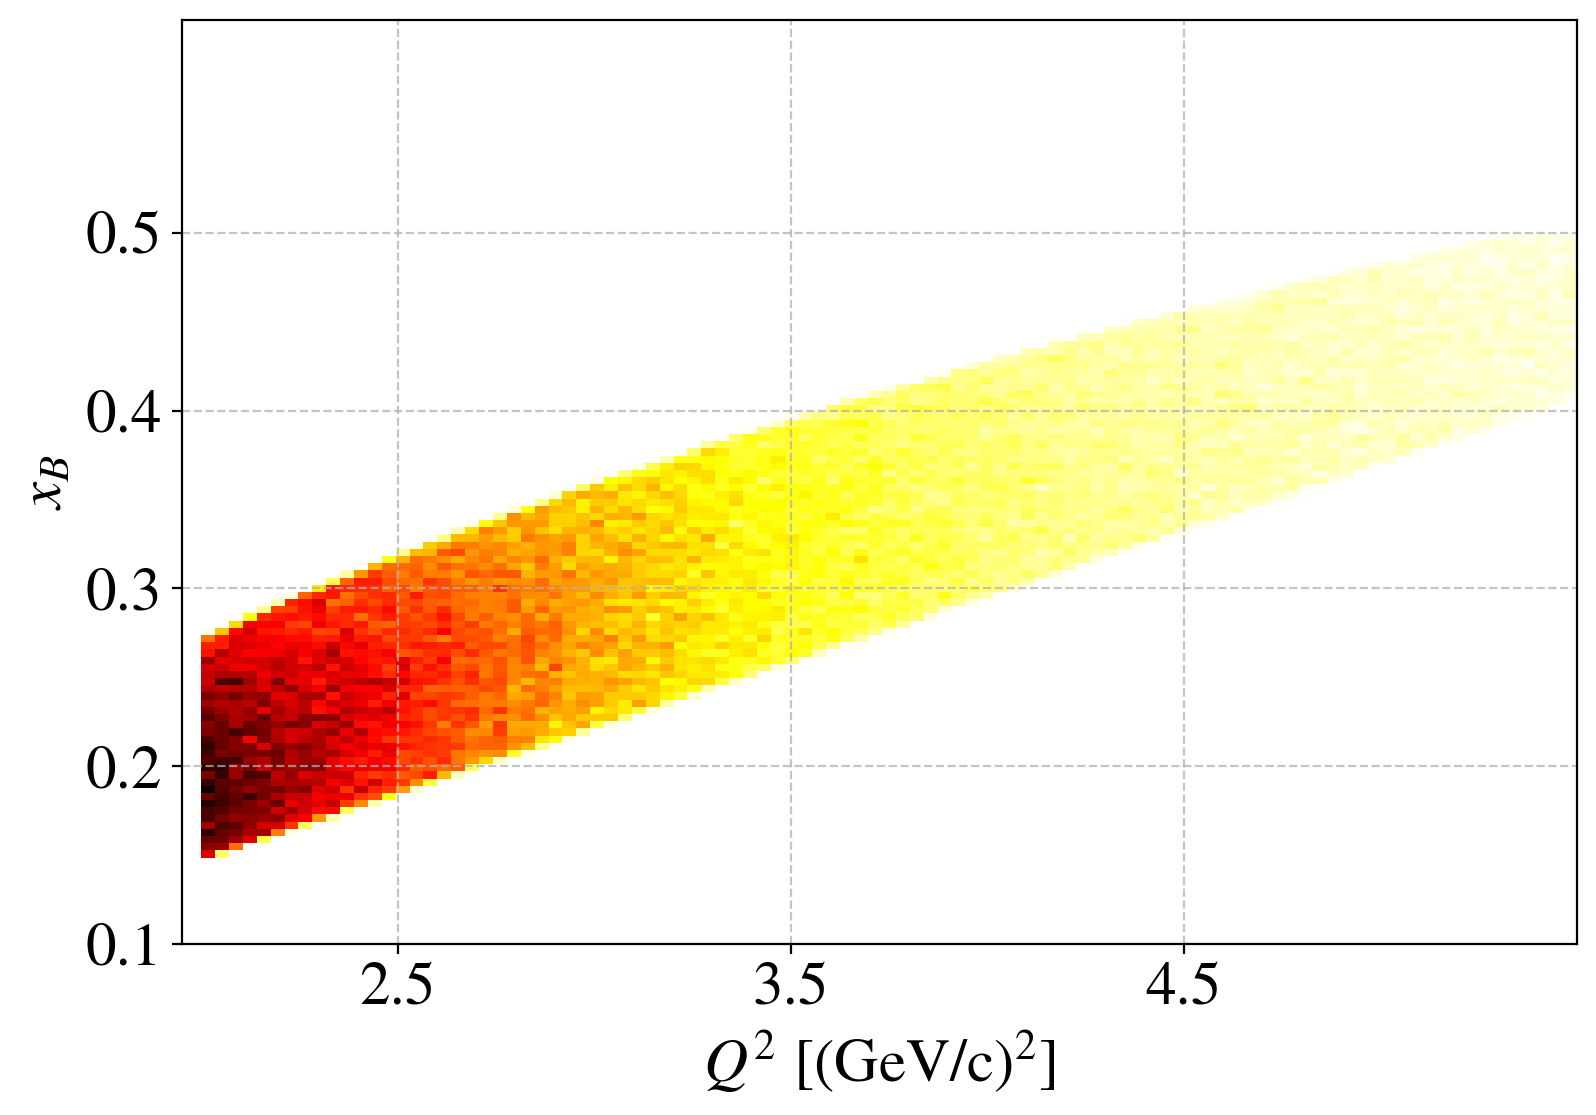

In [34]:
Q2min, Q2max = 2,5.5
xmin,  xmax  = 0.1,0.5
pi_ch = 'piplus'

fig = plt.figure(figsize=(9,6))
ax = fig.add_subplot(1,1,1)
df = e_e_pi_pass_cuts[pi_ch]
# plt.scatter( df.Q2 , df.xB )
plt.hist2d( df.Q2 , df.xB,  bins=(np.linspace(Q2min,Q2max,100),np.linspace(xmin,xmax,100)), cmap = 'hot_r' );

set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','$x_B$',
         do_add_grid=True, do_add_legend=False,fontsize=22,
         xlim=(1.95,Q2max),
         xticks=(2.5,3.5,4.5),
         ylim=(0.1,0.62),
         yticks=(0.1, 0.2, 0.3, 0.4, 0.5)
        );

# JLAB2012_Q2 = [1.85, 2.3,   2.8,  3.3,  3.8,  4.3]
# JLAB2012_xB = [0.26, 0.32, 0.39, 0.46, 0.53, 0.60]
# plt.errorbar( x=JLAB2012_Q2, xerr=0.03, y=JLAB2012_xB, yerr=0.01, 
#              marker='o', 
#              markerfacecolor='m', 
#              color='m', 
#              markeredgecolor='k', 
#              linestyle='None', capthick=2, capsize=2)

# Cornell1977_Q2 = [2.0,  4.0 ]
# Cornell1977_xB = [0.24, 0.50]
# plt.errorbar( x=Cornell1977_Q2, xerr=0.03, y=Cornell1977_xB, yerr=0.01, 
#              marker='o', 
#              markerfacecolor='c', 
#              color='c', 
#              markeredgecolor='k', 
#              linestyle='None', capthick=2, capsize=2)

## $M_X$ in several bins of $Q^2$ 

### $d(e,e'\pi)$ data

In [16]:
Q2colors  = ['k','blue','red', 'forestgreen']
Q2min_arr = [2.0,  3.0   ,4.0    , 6            ]
Q2max_arr = [Q2min_arr[i] for i in range(len(Q2min_arr))]
Q2max_arr.pop(0)
Q2max_arr.append(8.5)
Q2min_arr,Q2max_arr

([2.0, 3.0, 4.0, 6], [3.0, 4.0, 6, 8.5])

2.01 2.99 k
3.01 3.99 blue
4.01 5.99 red
6.01 8.49 forestgreen
2.01 2.99 k
3.01 3.99 blue
4.01 5.99 red
6.01 8.49 forestgreen


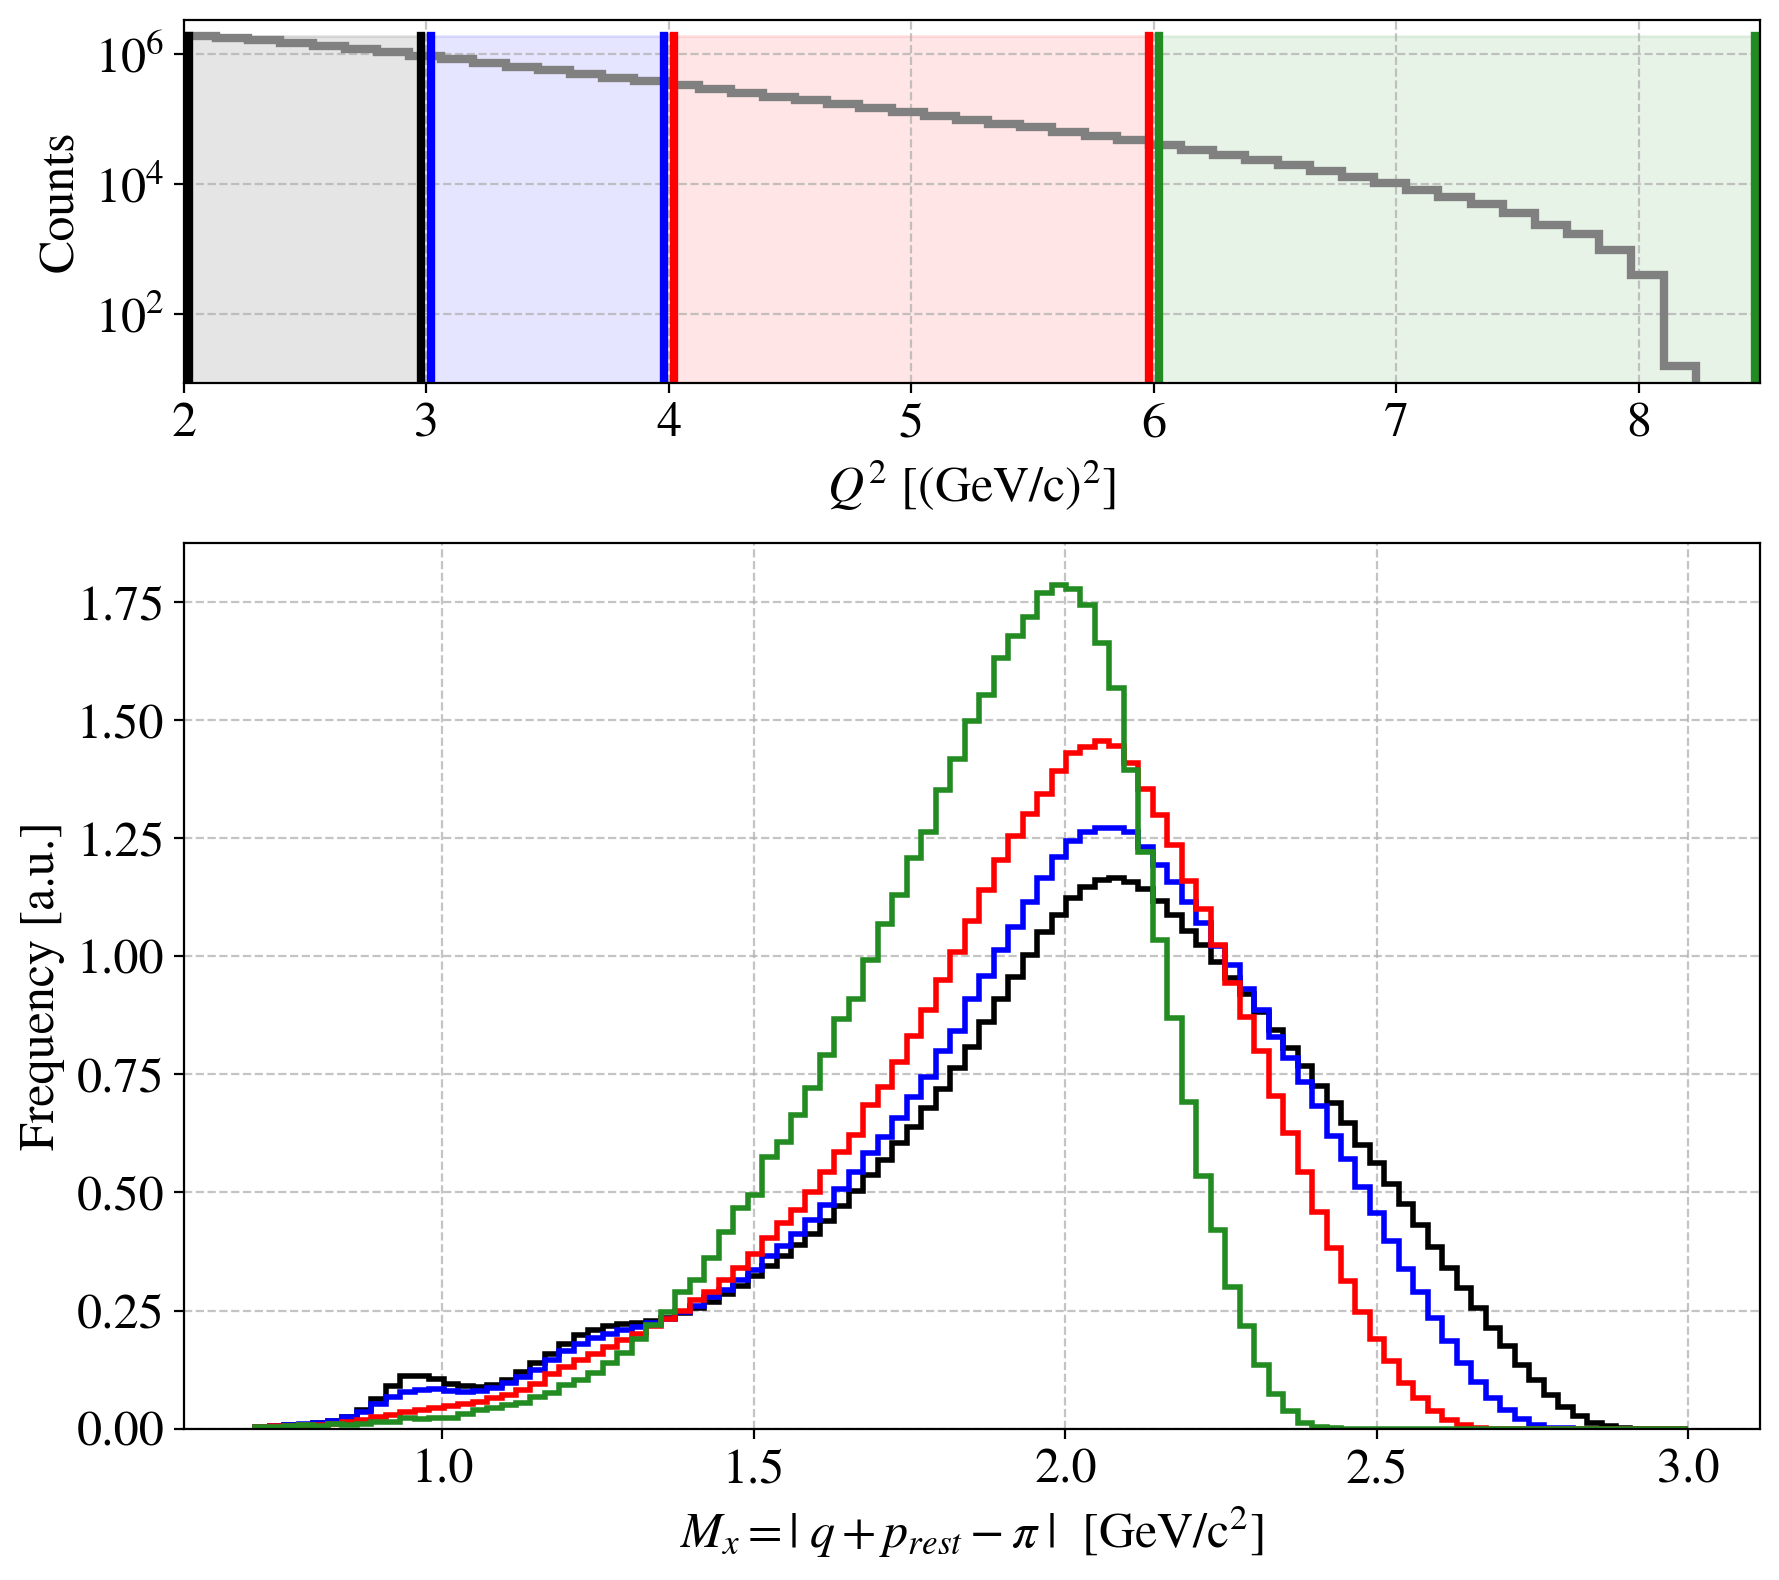

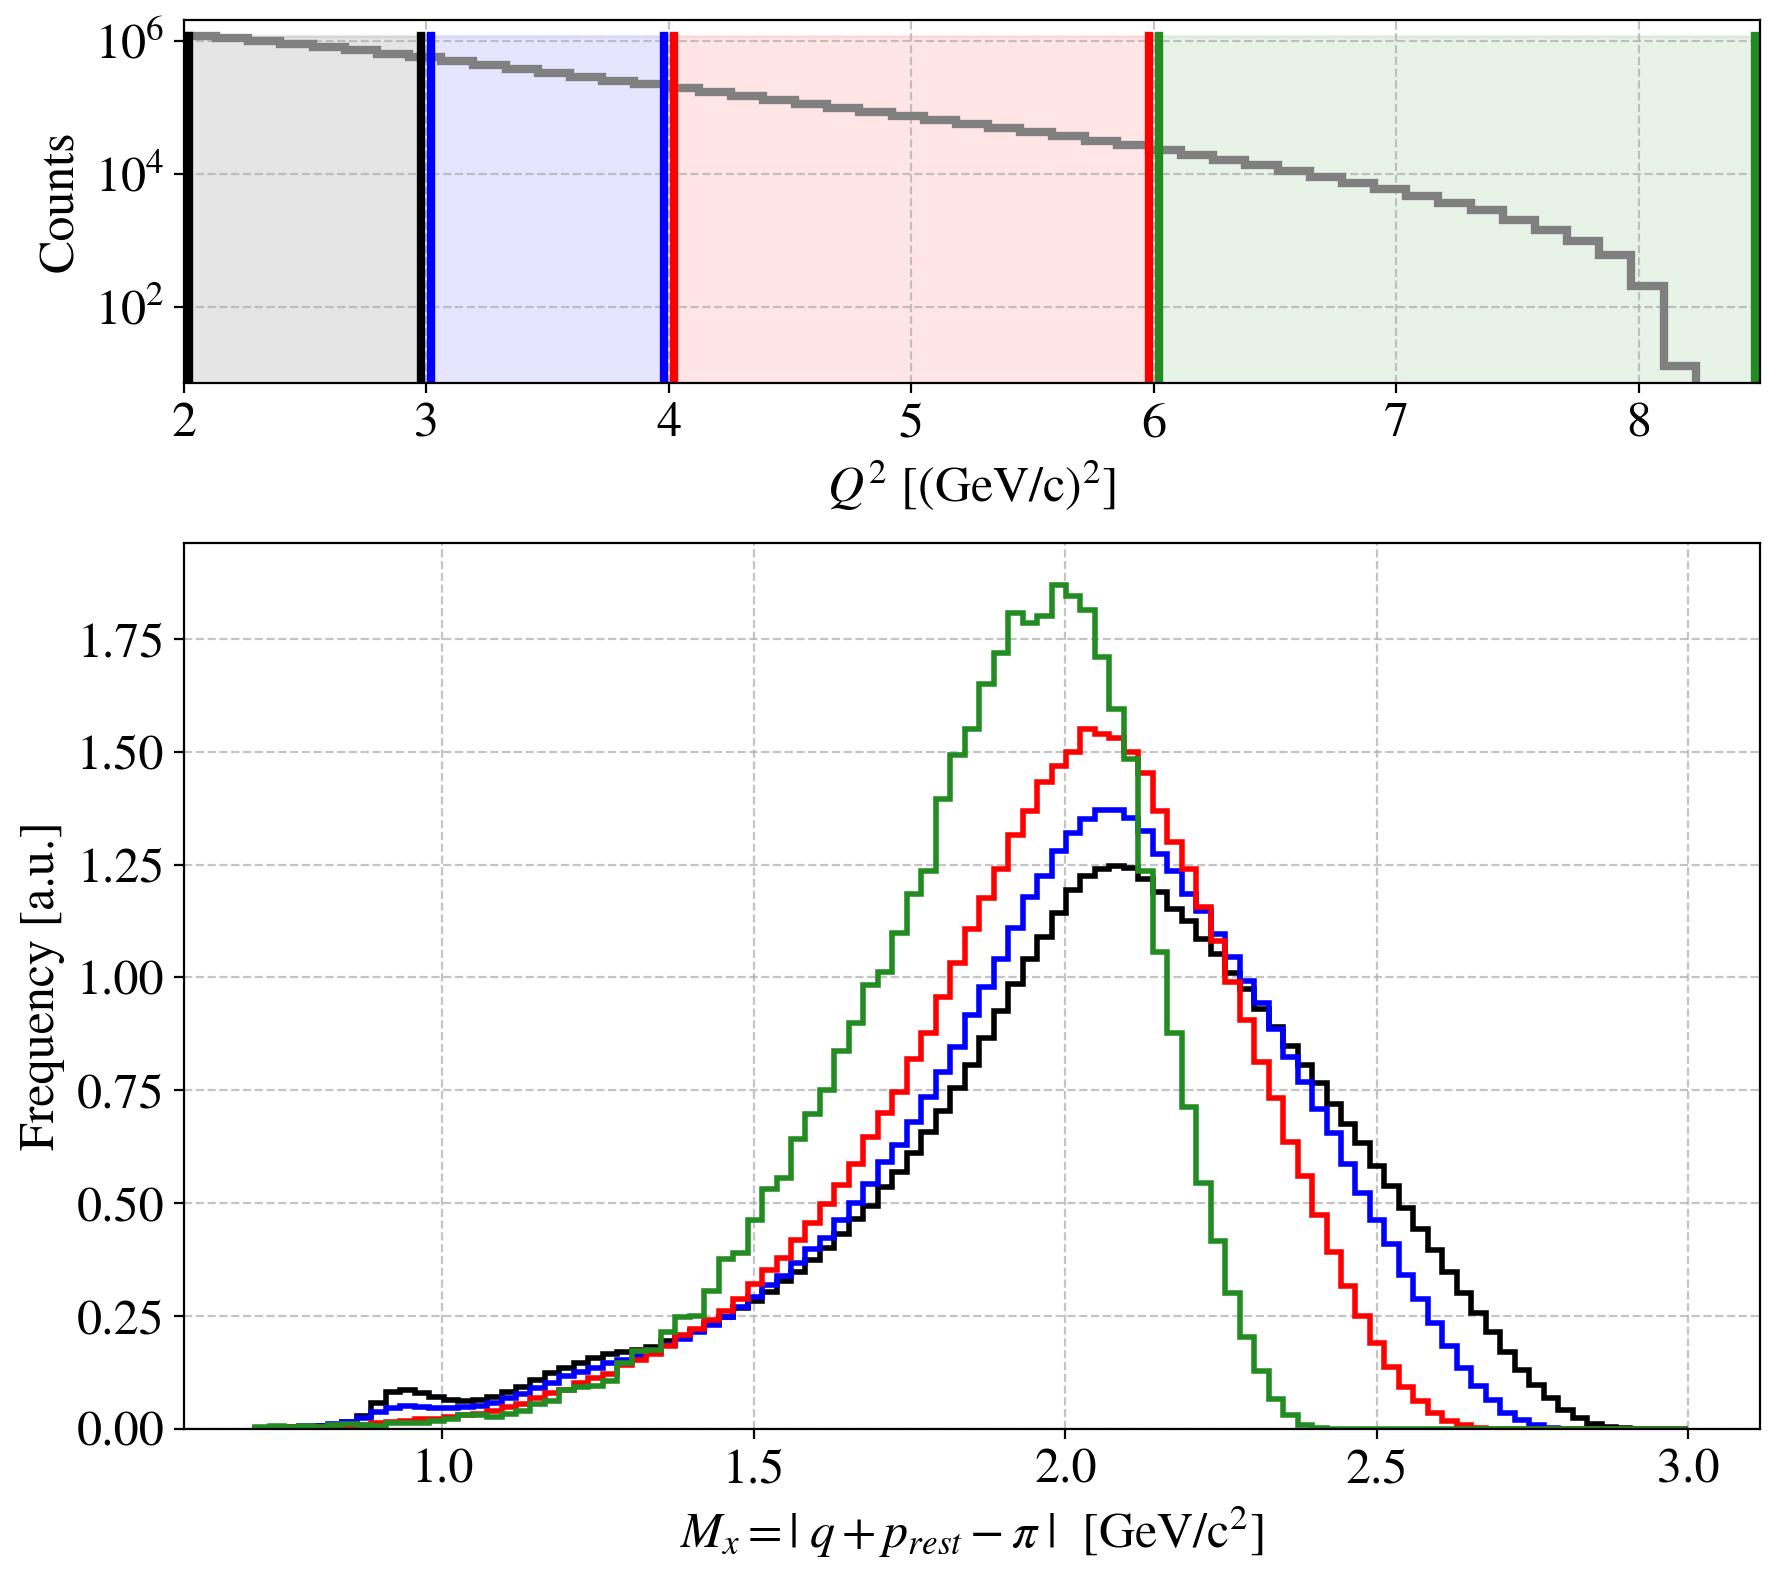

In [17]:
for pi_ch,pi_print in zip(pi_charge_names,pi_prints):

    df = e_e_pi_pass_cuts[pi_ch]

    fig = plt.figure(figsize=(9,8),tight_layout=True)
    ax = fig.add_subplot(3,1,1)
    h,edges,_=plt.hist ( df.Q2 , bins=(np.linspace(2,8.5,50)), edgecolor='grey', facecolor='grey', linewidth=3, density=False,histtype='step',);
    ymax = np.max(h)
    set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','Counts',
             do_add_grid=True, do_add_legend=False,fontsize=18,xlim=(2,8.5),
            );
    for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
        print(Q2min+0.01,Q2max-0.01,color)
        ax.plot([Q2min+0.02,Q2min+0.02],[0,ymax],'-',color=color,linewidth=3)
        ax.plot([Q2max-0.02,Q2max-0.02],[0,ymax],'-',color=color,linewidth=3)
        ax.fill_between([Q2min+0.02,Q2max-0.02],[0,0],[ymax,ymax],color=color, alpha=0.1)
    ax.set_yscale('log')


    ax = fig.add_subplot(3,1,(2,3))
    for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
        df_in_bin = df[(Q2min < df.Q2)  & (df.Q2 < Q2max)]
        plt.hist ( df_in_bin.M_x , bins=(np.linspace(0.7,3,100)), color=color, edgecolor=color, density=True, histtype='step', linewidth=2 );

    set_axes(ax,'$M_x = |\; q + p_{rest} - \pi \;|$  [GeV/c$^2$]','Frequency [a.u.]',
             do_add_grid=True, do_add_legend=False,fontsize=18
            );

### Free-proton $p(e,e'\pi)$ data

In [13]:
Q2colors  = ['k','blue','red', 'forestgreen']
Q2min_arr = [2.0,  3.0   ,4.0    , 6            ]
Q2max_arr = [Q2min_arr[i] for i in range(len(Q2min_arr))]
Q2max_arr.pop(0)
Q2max_arr.append(8.5)
Q2min_arr,Q2max_arr

([2.0, 3.0, 4.0, 6], [3.0, 4.0, 6, 8.5])

2.01 2.99 k
3.01 3.99 blue
4.01 5.99 red
6.01 8.49 forestgreen


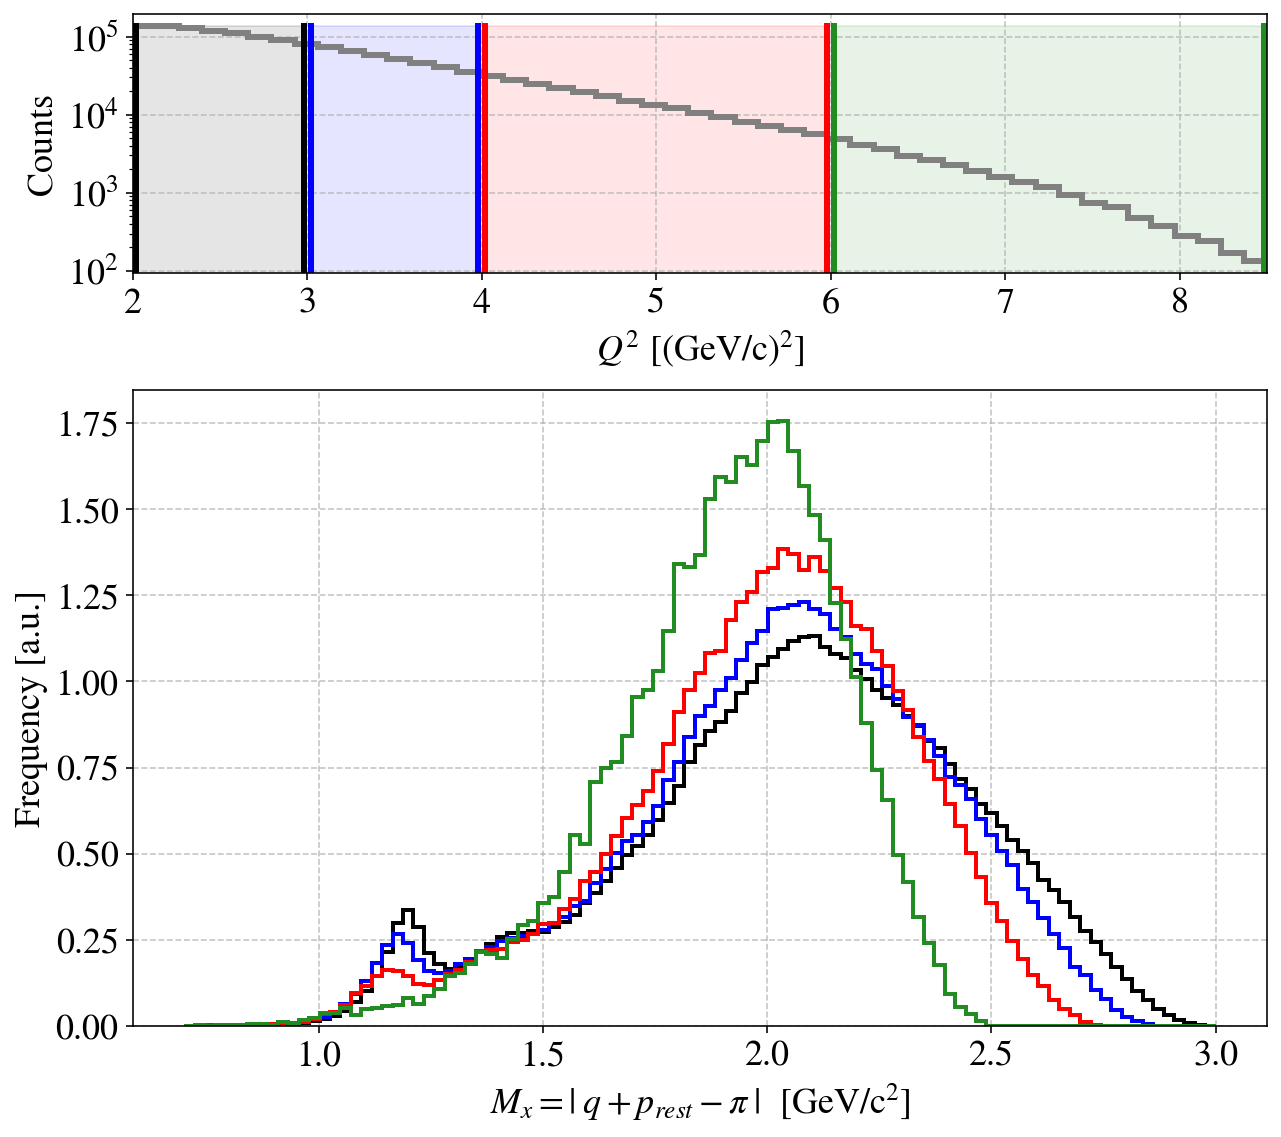

In [14]:
pi_ch = 'piplus'
df = e_e_pi_FreeP_pass_cuts[pi_ch]


fig = plt.figure(figsize=(9,8),tight_layout=True)
ax = fig.add_subplot(3,1,1)
h,edges,_=plt.hist ( df.Q2 , bins=(np.linspace(2,8.5,50)), edgecolor='grey', facecolor='grey', linewidth=3, density=False,histtype='step',);
ymax = np.max(h)
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','Counts',
         do_add_grid=True, do_add_legend=False,fontsize=18,xlim=(2,8.5),
        );
for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
    print(Q2min+0.01,Q2max-0.01,color)
    ax.plot([Q2min+0.02,Q2min+0.02],[0,ymax],'-',color=color,linewidth=3)
    ax.plot([Q2max-0.02,Q2max-0.02],[0,ymax],'-',color=color,linewidth=3)
    ax.fill_between([Q2min+0.02,Q2max-0.02],[0,0],[ymax,ymax],color=color, alpha=0.1)
ax.set_yscale('log')


ax = fig.add_subplot(3,1,(2,3))
for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
    df_in_bin = df[(Q2min < df.Q2)  & (df.Q2 < Q2max)]
    plt.hist ( df_in_bin.M_x , bins=(np.linspace(0.7,3,100)), color=color, edgecolor=color, density=True, histtype='step', linewidth=2 );
    
set_axes(ax,'$M_x = |\; q + p_{rest} - \pi \;|$  [GeV/c$^2$]','Frequency [a.u.]',
         do_add_grid=True, do_add_legend=False,fontsize=18
        );

2.01 2.99 k
3.01 3.99 blue
4.01 5.99 red
6.01 8.49 forestgreen


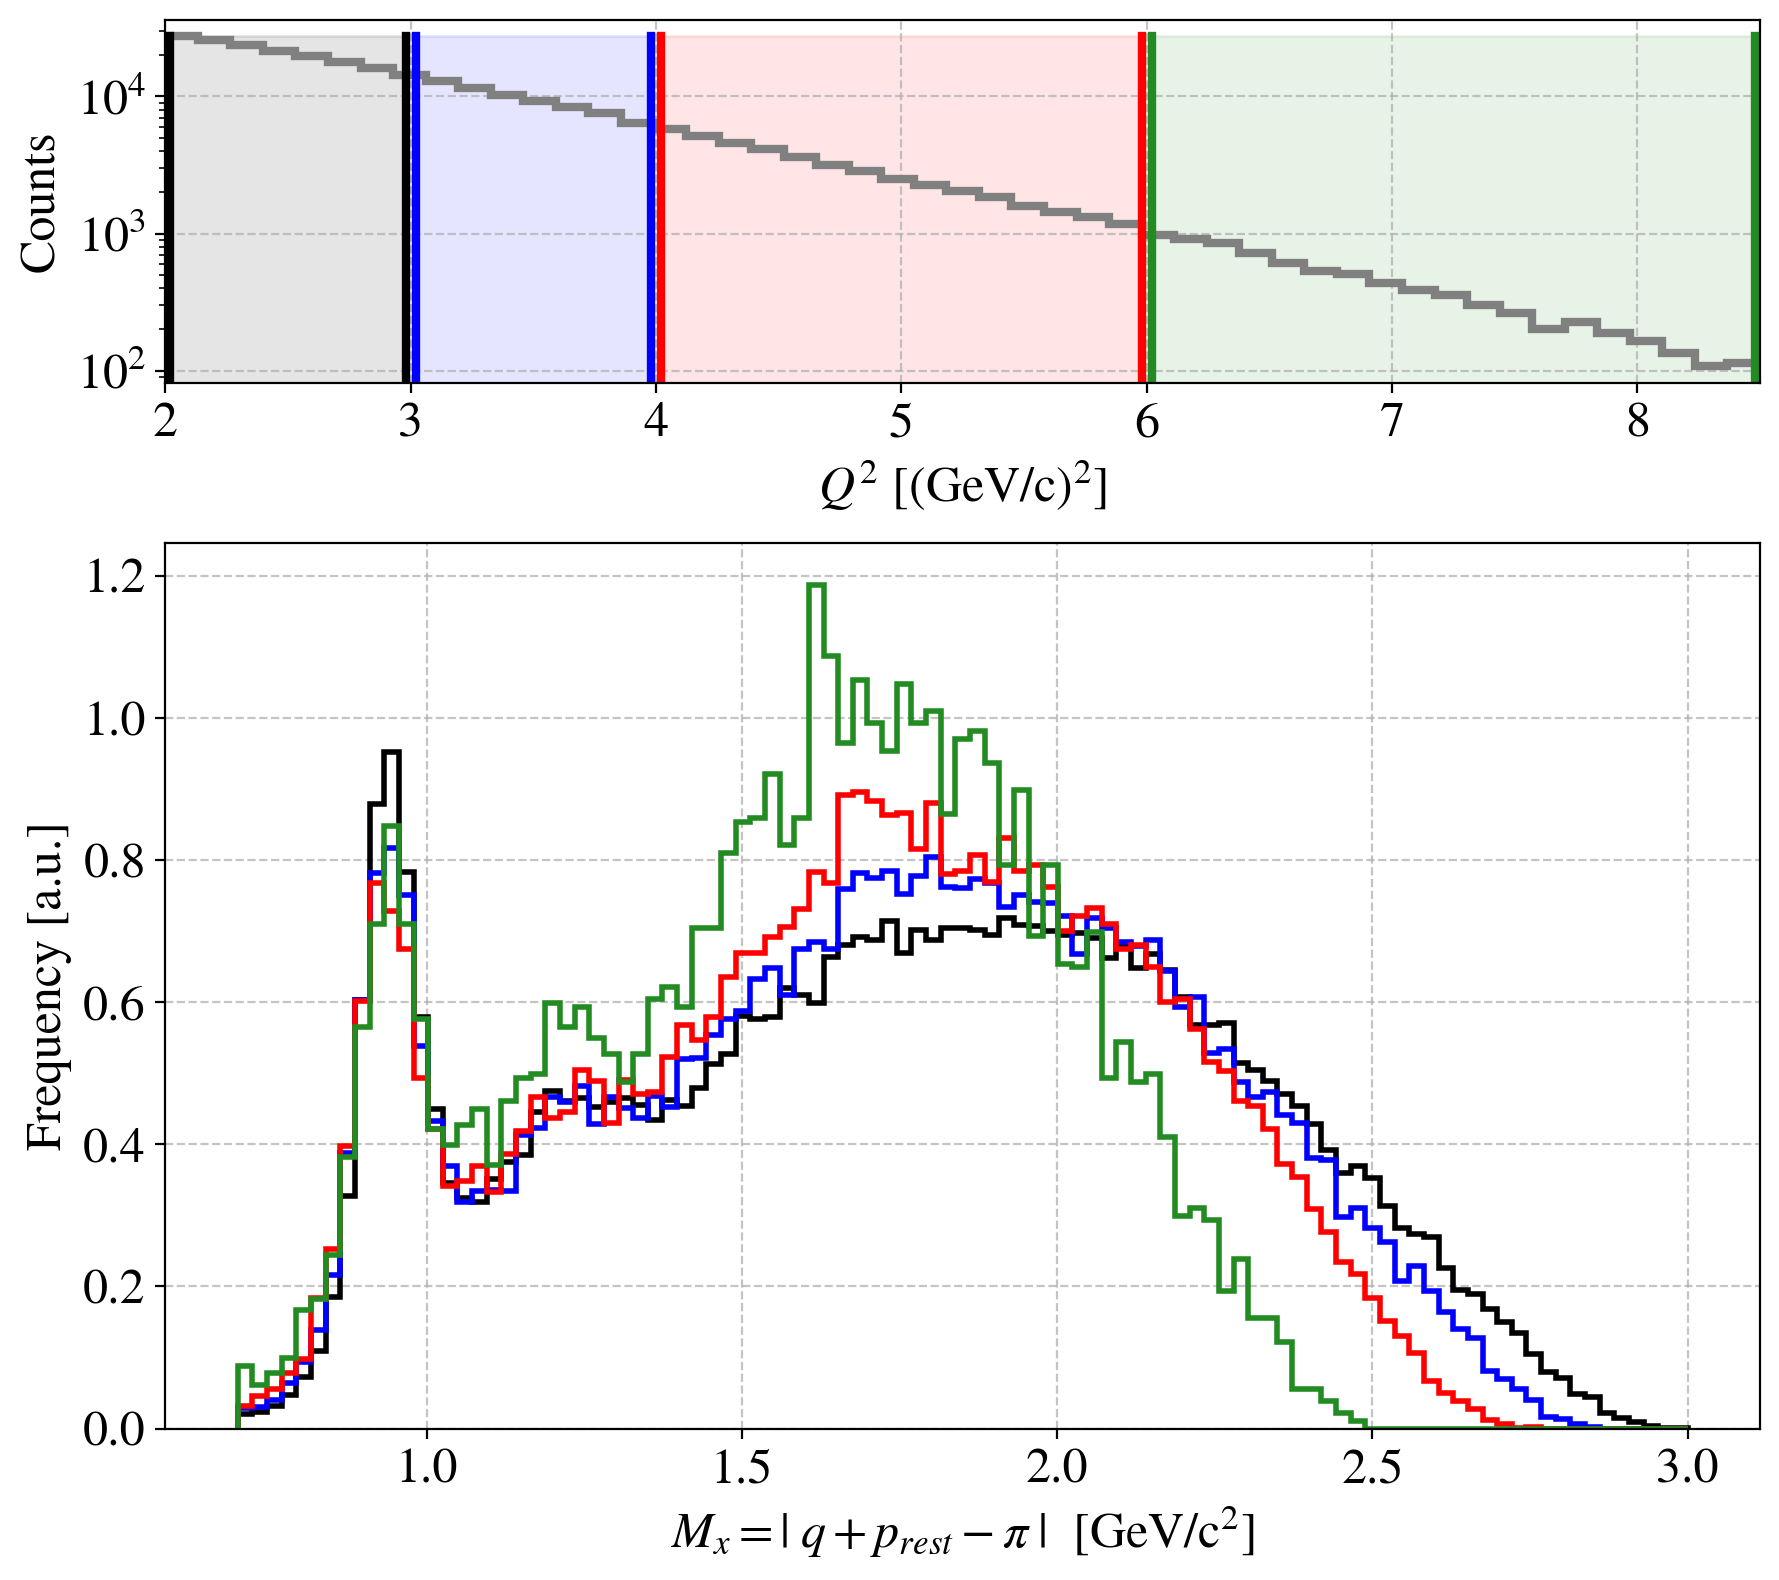

In [14]:
pi_ch = 'piplus'
df = e_e_pi_FreeP_pass_cuts[pi_ch]


fig = plt.figure(figsize=(9,8),tight_layout=True)
ax = fig.add_subplot(3,1,1)
h,edges,_=plt.hist ( df.Q2 , bins=(np.linspace(2,8.5,50)), edgecolor='grey', facecolor='grey', linewidth=3, density=False,histtype='step',);
ymax = np.max(h)
set_axes(ax,'$Q^2$ [(GeV/c)$^2$]','Counts',
         do_add_grid=True, do_add_legend=False,fontsize=18,xlim=(2,8.5),
        );
for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
    print(Q2min+0.01,Q2max-0.01,color)
    ax.plot([Q2min+0.02,Q2min+0.02],[0,ymax],'-',color=color,linewidth=3)
    ax.plot([Q2max-0.02,Q2max-0.02],[0,ymax],'-',color=color,linewidth=3)
    ax.fill_between([Q2min+0.02,Q2max-0.02],[0,0],[ymax,ymax],color=color, alpha=0.1)
ax.set_yscale('log')


ax = fig.add_subplot(3,1,(2,3))
for Q2min,Q2max,color in zip(Q2min_arr,Q2max_arr,Q2colors):
    df_in_bin = df[(Q2min < df.Q2)  & (df.Q2 < Q2max)]
    plt.hist ( df_in_bin.M_x , bins=(np.linspace(0.7,3,100)), color=color, edgecolor=color, density=True, histtype='step', linewidth=2 );
    
set_axes(ax,'$M_x = |\; q + p_{rest} - \pi \;|$  [GeV/c$^2$]','Frequency [a.u.]',
         do_add_grid=True, do_add_legend=False,fontsize=18
        );